In [1]:
import os
os.chdir("../../")

In [2]:
## Imports
import pandas as pd


In [23]:
## Load FT meetings
df = pd.read_pickle("./data_collection/meetings/ft_meetings_2012-2022.pkl")

In [24]:
df["year"] = df["time"].str[:4].astype(int)
df["month"] = df["time"].str[5:7].astype(int)
print(len(df))
df.head(1)

503228


,speaker,time,text,year,month
0,Aldersformanden Bertel Haarder (V),2012-10-02 H12:00,Ifølge grundloven begynder folketingsåret den ...,2012,10


In [98]:
## Clean speaker col
from utils.functions import load_speaker_fix_dict, load_fix_party_affiliations
import re
replace_dict = {'Tredje næstformand':'', 'Anden næstformand':'', 'Skatteministeren':'',
                       'Miljøministeren':'', 'Fødevareministeren':'', 'Statsministeren':'', 'Kirkeministeren':'',
                       'Uddannelses- og forskningsministeren':'', 'Ministeren for sundhed og forebyggelse':'','og kirke':'',
                       'Erhvervs- og vækstministeren':'', 'Undervisningsministeren':'', 'Udenrigsministeren':'',
                       'Den fg. formand':'', 'Forsvarsministeren':'', 'Fjerde næstformand':'', 'Formanden':'',
                       'Handels- og udviklingsministeren': '', 'Handels- og investeringsministeren':'', 'Transportministeren':'','Udviklingsministeren':'',
                       'Aldersformanden (Bertel Haarder)':'','Aldersformanden':'','Ministeren for ligestilling og kirke':'',
                       'Ministeren for børn, ligestilling, integration og sociale forhold':'','Kulturministeren':'',
                       'Ministeren for by, bolig og landdistrikter':'', 'Ministeren for nordisk samarbejde':'',
                       'Justitsministeren':'', 'Økonomi- og indenrigsministeren':'', 'Finansministeren':'',
                       'Første næstformand':'', 'Beskæftigelsesministeren':'','Ældreministeren':'',
                       'Klima-, energi- og bygningsministeren':'', 'Miljø- og fødevareministeren':'',
                       'Udlændinge-, integrations- og boligministeren':'', 'Social- og indenrigsministeren':'',
                       'Miljø- og fødevareministeren':'','Sundheds- og ældreministeren':'',
                       'Ministeren for børn, undervisning og ligestilling':'','Transport- og bygningsministeren':'', 
                       'Energi-, forsynings- og klimaministeren':'','Børne- og socialministeren':'',
                       'Sundhedsministeren':'','Ministeren for offentlig innovation':'','Erhvervsministeren':'',
                       'Transport-, bygnings- og boligministeren':'','Udlændinge- og integrationsministeren':'',
                       'Ministeren for ligestilling':'','Ministeren for udviklingssamarbejde':'',
                       'Ministeren for fiskeri og ligestilling':'','Social-, børne- og integrationsministeren':'',
                       'Ministeren for forskning, innovation og videregående uddannelser':'', 'Ministeren for udviklingsbistand' :'',
                       'Handels- og europaministeren':'','Ministeren for fødevarer, fiskeri og ligestilling':'',
                       'Boligministeren':'','Børne- og undervisningsministeren':'',
                        'Klima-, energi- og forsyningsministeren':'','Ministeren for fødevarer, landbrug og fiskeri':'',
                        'Beskæftigelsesminister og minister for ligestilling':'', 'Social- og ældreministeren':'',
                        'Social- og integrationsministeren': '', 'Europaministeren': '', 'Indenrigs- og boligministeren':'',

                    # also fix other strange things in data
                       '(Bertel Haarder) Bertel Haarder': 'Bertel Haarder (V)',
                       'Hans Christian Schmidt Hans Christian Schmidt':'Hans Christian Schmidt (V)',
                       'Karen Ellemann Karen Ellemann':'Karen Ellemann (V)',
                       'Peter Christensen Peter Christensen':'Peter Christensen (V)', 
                       'Karsten Lauritzen Karsten Lauritzen':'Karsten Lauritzen (V)',
                       'Kristian Jensen Kristian Jensen':'Kristian Jensen (V)',
                       'Søren Pape Poulsen Søren Pape Poulsen':'Søren Pape Poulsen (KF)',
                       'Ole Birk Olesen Ole Birk Olesen':'Ole Birk Olesen (LA)',
                       'Eva Kjer Hansen Eva Kjer Hansen':'Eva Kjer Hansen (V)',
                       'Morten Østergaard Morten Østergaard':'Morten Østergaard (RV)',
                       'Nick Hækkerup Nick Hækkerup':'Nick Hækkerup (S)',
                       'Rasmus Helveg Petersen Rasmus Helveg Petersen':'Rasmus Helveg Petersen (RV)',
                       'Benny Engelbrecht Benny Engelbrecht':'Benny Engelbrecht','Rasmus Prehn Rasmus Prehn':'Rasmus Prehn',
                       'Mette Frederiksen Mette Frederiksen':'Mette Frederiksen','Mogens Jensen Mogens Jensen':'Mogens Jensen',
                       'Morten Bødskov Morten Bødskov':'Morten Bødskov', 'Margrethe Vestager Margrethe Vestager': 'Margrethe Vestager',
                       'Astrid Krag Astrid Krag':'Astrid Krag', 'Ane Halsboe-Jørgensen Ane Halsboe-Jørgensen': 'Ane Halsboe-Jørgensen',
                       'Dan Jørgensen Dan Jørgensen':'Dan Jørgensen', 'Flemming Møller Mortensen Flemming Møller Mortensen':'Flemming Møller Mortensen',
                       'Simon Kollerup Simon Kollerup':'Simon Kollerup', 'Mattias Tesfaye Mattias Tesfaye': 'Mattias Tesfaye',
                       '(Henrik Dam Kristensen) Henrik Dam Kristensen':'Henrik Dam Kristensen'
                       }

rep = dict((re.escape(k), v) for k, v in replace_dict.items())
pattern = re.compile("|".join(rep.keys()))


In [101]:
def clean_names2(row):
    match = re.findall(pattern, row)
    if len(match) > 0:
        clean1 = row[len(match[0]):].strip()
        if clean1 == "":
            match = re.findall(pattern, row)
            if len(match) > 0 :
                return re.sub(pattern, replace_dict.get(match[0]), row)
            else: return "MISSING"
        else: return clean1
    else: return row


In [102]:
df["speaker_clean"] = df.apply(lambda row: clean_names2(row["speaker"]), axis=1)

In [103]:
#df.sample(5)
clean_names2('(Henrik Dam Kristensen) Henrik Dam Kristensen')

'Henrik Dam Kristensen'

In [112]:
parties = load_fix_party_affiliations()
def party_affil1(row):
    if parties.get(row) == None:
        return row
    else:
        return row + " " + parties.get(row)

def party_affil2(row):
    return row.split(" ")[-1]

party_affil1("Uffe Elbæk")

'Uffe Elbæk'

In [113]:
df["speaker_cleaner"] = df.apply(lambda row: party_affil1(row["speaker_clean"]), axis=1)
df.head(1)

,speaker,time,text,year,month,speaker_clean,speaker_cleaner,party
0,Aldersformanden Bertel Haarder (V),2012-10-02 H12:00,Ifølge grundloven begynder folketingsåret den ...,2012,10,Bertel Haarder (V),Bertel Haarder (V),(V)


In [114]:
df["party"] = df.apply(lambda row: party_affil2(row["speaker_cleaner"]), axis=1)
df.head(1)

,speaker,time,text,year,month,speaker_clean,speaker_cleaner,party
0,Aldersformanden Bertel Haarder (V),2012-10-02 H12:00,Ifølge grundloven begynder folketingsåret den ...,2012,10,Bertel Haarder (V),Bertel Haarder (V),(V)


In [116]:
df["party"].unique()
mistakes = ['Sohn', 'Elbæk', 'Dyhr',
       'Hækkerup', 'Poulsen',
       'Samuelsen', 'Rasmussen',  'Kristensen']
df_test = df[df["party"].isin(mistakes)]
df_test

,speaker,time,text,year,month,speaker_clean,speaker_cleaner,party
17,Erhvervs- og vækstministeren Ole Sohn,2012-10-03 H13:00,"Jeg er helt enig med spørgeren i, at vi har en...",2012,10,Ole Sohn,Ole Sohn,Sohn
21,Erhvervs- og vækstministeren Ole Sohn,2012-10-03 H13:00,"Med hensyn til de initiativer, som Danmark har...",2012,10,Ole Sohn,Ole Sohn,Sohn
25,Erhvervs- og vækstministeren Ole Sohn,2012-10-03 H13:00,"For at undgå nogen misforståelser, vil jeg lig...",2012,10,Ole Sohn,Ole Sohn,Sohn
29,Erhvervs- og vækstministeren Ole Sohn,2012-10-03 H13:00,"Der er ingen tvivl om, at boligjobordningen ha...",2012,10,Ole Sohn,Ole Sohn,Sohn
33,Erhvervs- og vækstministeren Ole Sohn,2012-10-03 H13:00,"Jeg vil godt henvise til en opgørelse, som Dan...",2012,10,Ole Sohn,Ole Sohn,Sohn
...,...,...,...,...,...,...,...,...
288437,Søren Pape Poulsen,2019-01-15 H13:00,Tak for det. Så er vi kommet til den sidste ta...,2019,1,Søren Pape Poulsen,Søren Pape Poulsen,Poulsen
288441,Søren Pape Poulsen,2019-01-15 H13:00,"Præcis hvilken udformning det skal have, komme...",2019,1,Søren Pape Poulsen,Søren Pape Poulsen,Poulsen
288445,Søren Pape Poulsen,2019-01-15 H13:00,"Jeg er simpelt hen i tvivl om, om jeg forstår ...",2019,1,Søren Pape Poulsen,Søren Pape Poulsen,Poulsen
483067,Formanden (Henrik Dam Kristensen) Henrik Dam K...,2021-10-05 H11:50,Herefter skal jeg så give ordet til statsminis...,2021,10,(Henrik Dam Kristensen) Henrik Dam Kristensen,(Henrik Dam Kristensen) Henrik Dam Kristensen,Kristensen


In [124]:
df = df[~df["party"].isin(mistakes)]
df.isnull().sum()

speaker            0
time               0
text               0
year               0
month              0
speaker_clean      0
speaker_cleaner    0
party              0
dtype: int64

In [125]:
def clean_names3(row):
    return row.split("(")[0]

df["speaker_cleaner"] = df.apply(lambda row: clean_names3(row["speaker_cleaner"]), axis=1)
df.head(1)

C:\Users\COBOD\AppData\Local\Temp/ipykernel_8444/226006738.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["speaker_cleaner"] = df.apply(lambda row: clean_names3(row["speaker_cleaner"]), axis=1)


,speaker,time,text,year,month,speaker_clean,speaker_cleaner,party
0,Aldersformanden Bertel Haarder (V),2012-10-02 H12:00,Ifølge grundloven begynder folketingsåret den ...,2012,10,Bertel Haarder (V),Bertel Haarder,(V)


In [126]:
def get_time(row):
    return row.split(" ")[0].replace("-", "")

df["date"] = df.apply(lambda row: get_time(row["time"]), axis=1)
df["date"] = pd.to_datetime(df['date'], format='%Y%m%d')
df.head(1)

C:\Users\COBOD\AppData\Local\Temp/ipykernel_8444/851268141.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["date"] = df.apply(lambda row: get_time(row["time"]), axis=1)
C:\Users\COBOD\AppData\Local\Temp/ipykernel_8444/851268141.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["date"] = pd.to_datetime(df['date'], format='%Y%m%d')


,speaker,time,text,year,month,speaker_clean,speaker_cleaner,party,date
0,Aldersformanden Bertel Haarder (V),2012-10-02 H12:00,Ifølge grundloven begynder folketingsåret den ...,2012,10,Bertel Haarder (V),Bertel Haarder,(V),2012-10-02


In [127]:
df["lower"] = df[["speaker"]].applymap(str.lower)
df.head(1)

C:\Users\COBOD\AppData\Local\Temp/ipykernel_8444/3657918583.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["lower"] = df[["speaker"]].applymap(str.lower)


,speaker,time,text,year,month,speaker_clean,speaker_cleaner,party,date,lower
0,Aldersformanden Bertel Haarder (V),2012-10-02 H12:00,Ifølge grundloven begynder folketingsåret den ...,2012,10,Bertel Haarder (V),Bertel Haarder,(V),2012-10-02,aldersformanden bertel haarder (v)


In [128]:
#drop all forman /facilitator quotes
print(len(df))
df = df[df['lower'].str.contains("formand")==False]
print(len(df))

503103
240114


In [129]:
## Add title if present
def add_title(row):
    speaker_full = row["speaker"]
    speaker_cleaner = row["speaker_clean"]
    if speaker_full.strip() == speaker_cleaner.strip():
        return "Member"
    else:
        title = speaker_full[0:(len(speaker_full)-len(speaker_cleaner))]
        return title.strip()

In [130]:
df["title"] = df.apply(lambda row: add_title(row[["speaker", "speaker_clean"]]),axis=1) ## Running time: 4m 21s
df.sample(5)

,speaker,time,text,year,month,speaker_clean,speaker_cleaner,party,date,lower,title
22450,Ole Hækkerup (S),2013-02-22 H10:00,"Nej, det kan jeg afkræfte. Det første, jeg ger...",2013,2,Ole Hækkerup (S),Ole Hækkerup,(S),2013-02-22,ole hækkerup (s),Member
363514,Bent Bøgsted (DF),2020-06-22 H09:00,"Tak for det, formand. Jeg vil godt lige vende ...",2020,6,Bent Bøgsted (DF),Bent Bøgsted,(DF),2020-06-22,bent bøgsted (df),Member
314041,"Klima-, energi- og forsyningsministeren Dan Jø...",2019-10-31 H10:00,Tak for det. Jeg takker ordførerne for komment...,2019,10,Dan Jørgensen,Dan Jørgensen,(S),2019-10-31,"klima-, energi- og forsyningsministeren dan jø...","Klima-, energi- og forsyningsministeren"
101417,Justitsministeren Mette Frederiksen,2015-03-25 H13:00,"Det er jo da i hvert fald sådan, at der nu kom...",2015,3,Mette Frederiksen,Mette Frederiksen,(S),2015-03-25,justitsministeren mette frederiksen,Justitsministeren
155093,Erik Christensen (S),2016-04-20 H13:00,Tak. Jeg læser spørgsmålet op. Forventer minis...,2016,4,Erik Christensen (S),Erik Christensen,(S),2016-04-20,erik christensen (s),Member


In [131]:
df_clean = df
df_clean = df_clean[["speaker","speaker_cleaner", "title", "party", "text", "date"]].rename(columns={"speaker_cleaner":"politician"})
df_clean.head(1)

,speaker,politician,title,party,text,date
8,Statsministeren Helle Thorning-Schmidt,Helle Thorning-Schmidt,Statsministeren,(S),(Talen er under udarbejdelse) (Talen er under ...,2012-10-02


In [132]:
df_clean.sort_values(by="date", ascending=False).head(5)

,speaker,politician,title,party,text,date
503223,Jette Gottlieb (EL),Jette Gottlieb,Member,(EL),Mange tak. Hele den her debat handler om noget...,2022-03-16
503145,Torsten Gejl (ALT),Torsten Gejl,Member,(ALT),Hvis man nu bruger 2 mia. kr. fra udviklingsbi...,2022-03-16
503109,Anne Sophie Callesen (RV),Anne Sophie Callesen,Member,(RV),"Vi har ikke, da vi forhandler om loven, altså ...",2022-03-16
503111,Morten Messerschmidt (DF),Morten Messerschmidt,Member,(DF),"Tak, formand. Nu skal jeg jo ikke på den måde ...",2022-03-16
503113,Anne Sophie Callesen (RV),Anne Sophie Callesen,Member,(RV),"Jamen tak for forslaget. Men nej, vi kunne ald...",2022-03-16


In [133]:
#df.to_pickle("ft_meetings_2012-2021_clean.pkl")
df_clean.to_pickle("ft_meetings_2012-2022_clean_v2.2.pkl")

In [40]:
df_load = pd.read_pickle("./ft_meetings_2012-2021_clean_v2.pkl")

In [41]:
df_load.head()

,speaker,politician,party,text,date
8,Statsministeren Helle Thorning-Schmidt,Helle Thorning-Schmidt,(S),(Talen er under udarbejdelse) (Talen er under ...,2012-10-02
9,Statsministeren Helle Thorning-Schmidt,Helle Thorning-Schmidt,(S),Vi skal bringe Danmark godt og trygt gennem kr...,2012-10-02
15,Kim Andersen (V),Kim Andersen,(V),Tak for det. Jeg vil gerne spørge erhvervsmini...,2012-10-03
17,Erhvervs- og vækstministeren Ole Sohn,Ole Sohn,Sohn,"Jeg er helt enig med spørgeren i, at vi har en...",2012-10-03
19,Kim Andersen (V),Kim Andersen,(V),"Jeg er helt med på de initiativer, der er tage...",2012-10-03


In [76]:
df1_cl = pd.read_csv("../../climate_classifier/scored_data/ft_meetings_climate_all_2.1.csv")

FileNotFoundError: [Errno 2] No such file or directory: '../../climate_classifier/scored_data/ft_meetings_climate_all_2.1.csv'

In [ ]:
df2_cl = pd.read_

In [2]:
import pandas as pd
df_test = pd.read_pickle("./ft_meetings_2021new-2022_clean_v2.pkl")

In [3]:
df_test

,speaker,politician,party,text,date
50854,Henrik Møller (S),Henrik Møller,(S),Tak for det. Det er jo noget af et syn hernede...,2021-08-26
50856,Victoria Velasquez (EL),Victoria Velasquez,(EL),"Tak for det. Jeg må indrømme, at jeg synes, de...",2021-08-26
50858,Henrik Møller (S),Henrik Møller,(S),"Vi har jo sagt, at vi nu laver den her lønstru...",2021-08-26
50860,Victoria Velasquez (EL),Victoria Velasquez,(EL),Men man kunne jo sagtens stemme for det ændrin...,2021-08-26
50862,Henrik Møller (S),Henrik Møller,(S),"Jamen altså, når vi snakker om parterne, handl...",2021-08-26
...,...,...,...,...,...
72538,Christian Juhl (EL),Christian Juhl,(EL),Nej.,2022-03-16
72540,Morten Messerschmidt (DF),Morten Messerschmidt,(DF),"Jeg blev bare også inspireret af det svar, som...",2022-03-16
72542,Christian Juhl (EL),Christian Juhl,(EL),Jamen det vil jeg gerne gøre. Jeg vil opfordre...,2022-03-16
72544,Jens Rohde (KD),Jens Rohde,(KD),"Tak for det. Jeg har bedt om ordet, fordi jeg ...",2022-03-16


### Data processing arguments

In [1]:
import pandas as pd
from transformers import AutoTokenizer, DataCollatorWithPadding
from datasets import Dataset, DatasetDict

In [2]:
tokenizer = AutoTokenizer.from_pretrained("Maltehb/danish-bert-botxo")

In [3]:
df = pd.read_pickle("./ft_meetings_2012-2022_clean_v2.1.pkl")
df.head()

,speaker,politician,title,party,text,date
8,Statsministeren Helle Thorning-Schmidt,Helle Thorning-Schmidt,Statsministeren,(S),(Talen er under udarbejdelse) (Talen er under ...,2012-10-02
9,Statsministeren Helle Thorning-Schmidt,Helle Thorning-Schmidt,Statsministeren,(S),Vi skal bringe Danmark godt og trygt gennem kr...,2012-10-02
15,Kim Andersen (V),Kim Andersen,Member,(V),Tak for det. Jeg vil gerne spørge erhvervsmini...,2012-10-03
17,Erhvervs- og vækstministeren Ole Sohn,Ole Sohn,Erhvervs- og vækstministeren,Sohn,"Jeg er helt enig med spørgeren i, at vi har en...",2012-10-03
19,Kim Andersen (V),Kim Andersen,Member,(V),"Jeg er helt med på de initiativer, der er tage...",2012-10-03


In [4]:
df["party"].unique()

array(['(S)', '(V)', 'Sohn', '(DF)', 'Bach', '(EL)', '(LA)', '(RV)',
       '(SF)', '(KF)', '(IA)', '(SIU)', '(SP)', '(JF)', 'Gjerskov',
       'Søvndal', 'Pedersen', 'Hækkerup', 'Dyhr', 'Elbæk', 'Vestager',
       'Wammen', '(UFG)', '(ALT)', '(T)', '(NQ)', 'Poulsen', 'Samuelsen',
       'Rasmussen', '(NB)', 'Krag', 'Halsboe-Jørgensen', 'Jørgensen',
       'Bek', 'Mortensen', '(KD)', 'Kollerup', 'Tesfaye', 'Petersen',
       '(FG)', 'Bruus'], dtype=object)

In [4]:
dataset = Dataset.from_pandas(df)
dataset

Dataset({
    features: ['speaker', 'politician', 'title', 'party', 'text', 'date', '__index_level_0__'],
    num_rows: 240237
})

In [5]:
def tokenize(batch):
    tokenized_batch = tokenizer(batch['text'], padding=False, truncation=False)
    return tokenized_batch


tokenized_datasets = dataset.map(tokenize, batched=True)

data_collator = DataCollatorWithPadding(tokenizer=tokenizer)

100%|██████████| 241/241 [03:30<00:00,  1.15ba/s]


In [20]:
tokenized_datasets
df_t = tokenized_datasets.to_pandas()

In [21]:
df_t = df_t[["speaker", "input_ids", "text"]]
df_t

,speaker,input_ids,text
0,Statsministeren Helle Thorning-Schmidt,"[2, 209, 23874, 33, 254, 9363, 3825, 209, 2387...",(Talen er under udarbejdelse) (Talen er under ...
1,Statsministeren Helle Thorning-Schmidt,"[2, 54, 155, 5493, 739, 355, 28, 8459, 473, 15...",Vi skal bringe Danmark godt og trygt gennem kr...
2,Kim Andersen (V),"[2, 1115, 30, 46, 771, 82, 137, 705, 4072, 264...",Tak for det. Jeg vil gerne spørge erhvervsmini...
3,Erhvervs- og vækstministeren Ole Sohn,"[2, 82, 33, 424, 5632, 61, 4236, 6, 23, 911, 3...","Jeg er helt enig med spørgeren i, at vi har en..."
4,Kim Andersen (V),"[2, 82, 33, 424, 61, 58, 69, 8062, 911, 59, 33...","Jeg er helt med på de initiativer, der er tage..."
...,...,...,...
240232,Christian Juhl (EL),"[2, 1231, 771, 3]",Nej.
240233,Morten Messerschmidt (DF),"[2, 82, 229, 460, 201, 6191, 47, 46, 958, 911,...","Jeg blev bare også inspireret af det svar, som..."
240234,Christian Juhl (EL),"[2, 9525, 46, 137, 82, 705, 548, 771, 82, 137,...",Jamen det vil jeg gerne gøre. Jeg vil opfordre...
240235,Jens Rohde (KD),"[2, 1115, 30, 46, 771, 82, 87, 6945, 96, 5350,...","Tak for det. Jeg har bedt om ordet, fordi jeg ..."


In [30]:
def get_no_tokens(row):
    tokens = row["input_ids"].size
    return tokens
    
def get_no_words(row):
    words = len(row["text"].split(" "))
    return words

def get_no_sents(row):
    words = len(row["text"].split("."))
    return words

In [23]:
df_t["tokens"] = df_t.apply(lambda row: get_no_tokens(row[["input_ids"]]), axis=1) ## Running time 1m 50s
df_t.sample(5)


,speaker,input_ids,text,tokens
218561,Forsvarsministeren Trine Bramsen,"[2, 82, 98, 89, 11368, 911, 39, 59, 89, 33, 54...","Jeg kan ikke genkende, at der ikke er svaret p...",149
215364,Karina Lorentzen Dehnhardt (SF),"[2, 1115, 771, 82, 137, 705, 4072, 4298, 771, ...","Tak. Jeg vil gerne spørge hr. Rasmus Stoklund,...",162
5698,Simon Kollerup (S),"[2, 1115, 771, 46, 33, 2713, 39, 353, 2715, 58...",Tak. Det er dejligt at have Venstre på talerst...,237
97173,Hans Andersen (V),"[2, 1115, 30, 46, 771, 7152, 6072, 7004, 287, ...",Tak for det. Socialdemokratiet støtter nu fors...,147
58350,Rasmus Jarlov (KF),"[2, 106, 33, 54, 156, 39, 198, 12032, 23, 46, ...","Så er vi ved at være ovre i det, som jeg nævnt...",143


In [26]:
df_t["words"] = df_t.apply(lambda row: get_no_words(row[["text"]]), axis=1) ## Running time 1m 54s
df_t.sample(5)

,speaker,input_ids,text,tokens,words
23142,Mike Legarth (KF),"[2, 115, 82, 2070, 298, 911, 39, 11104, 33, 56...","Men jeg håber da, at ministeren er enig i, at ...",110,86
32743,Jørn Dohrmann (DF),"[2, 46, 33, 388, 1523, 525, 911, 82, 714, 911,...","Det er jo netop derfor, jeg siger, at man skal...",227,192
177021,Ulla Tørnæs (V),"[2, 191, 177, 5355, 33, 46, 388, 2365, 10349, ...",Efter min opfattelse er det jo klart regeringe...,147,125
115875,Carl Holst (V),"[2, 355, 8162, 911, 269, 434, 771, 2715, 98, 2...","Godt nytår, alle sammen. Venstre kan støtte lo...",209,160
14685,Ane Halsboe-Jørgensen (S),"[2, 287, 156, 82, 355, 911, 39, 273, 125, 93, ...","Nu ved jeg godt, at når man som nordjyde siger...",110,90


In [31]:
df_t["sents"] = df_t.apply(lambda row: get_no_sents(row[["text"]]), axis=1) ## Running time 2m
df_t.sample(5)

,speaker,input_ids,text,tokens,words,sents
112043,Jane Heitmann (V),"[2, 82, 33, 4084, 5632, 23, 911, 39, 54, 155, ...","Jeg er fuldstændig enig i, at vi skal priorite...",158,118,10
165310,Transportministeren Benny Engelbrecht,"[2, 1167, 911, 39, 552, 26331, 112, 160, 3551,...","Altså, at skulle disponere over projekter, som...",207,170,4
171921,Transportministeren Benny Engelbrecht,"[2, 287, 635, 4236, 6, 1602, 17976, 105, 3248,...","Nu fik spørgeren sagt VVM-undersøgelse, men de...",173,132,8
230487,Udlændinge- og integrationsministeren Mattias ...,"[2, 82, 33, 1128, 89, 424, 5632, 61, 4298, 771...",Jeg er faktisk ikke helt enig med hr. Marcus K...,43,34,4
199591,Jeppe Bruus (S),"[2, 1115, 30, 9942, 6, 45, 46, 771, 106, 87, 8...",Tak for opbakningen til det. Så har jeg et and...,178,147,7


In [35]:
df_t.describe()

,tokens,words,sents
count,240237.000000,240237.000000,240237.000000
mean,255.148175,205.485437,10.370880
std,283.709049,229.888149,11.375783
min,4.000000,1.000000,1.000000
25%,123.000000,98.000000,5.000000
50%,177.000000,142.000000,7.000000
75%,261.000000,211.000000,11.000000
max,7862.000000,6338.000000,392.000000


In [36]:
df_t[df_t["tokens"]>512].describe()

,tokens,words,sents
count,23567.000000,23567.000000,23567.000000
mean,942.852972,762.229855,36.091314
std,462.039351,374.229728,20.419453
min,513.000000,350.000000,8.000000
25%,648.000000,525.000000,24.000000
50%,834.000000,675.000000,31.000000
75%,1066.000000,863.000000,41.000000
max,7862.000000,6338.000000,392.000000


In [37]:
df_t[df_t["tokens"]<512].describe()

,tokens,words,sents
count,216623.000000,216623.000000,216623.000000
mean,180.275188,144.870619,7.570558
std,94.700516,77.255226,4.279997
min,4.000000,1.000000,1.000000
25%,117.000000,93.000000,5.000000
50%,166.000000,133.000000,7.000000
75%,229.000000,185.000000,10.000000
max,511.000000,447.000000,43.000000


### Full to six-sent

In [3]:
import pandas as pd
df = pd.read_pickle("./ft_meetings_2012-2022_clean_v2.2.pkl")
df.head(1)

,speaker,politician,title,party,text,date
8,Statsministeren Helle Thorning-Schmidt,Helle Thorning-Schmidt,Statsministeren,(S),(Talen er under udarbejdelse) (Talen er under ...,2012-10-02


In [4]:
df.nunique()

speaker          826
politician       674
title             80
party             19
text          220456
date             990
dtype: int64

In [6]:
df["politician"] = df["politician"].str.strip()
print(len(df))
df = df.drop_duplicates(subset="text")
print(len(df))
df.nunique()

220456
220456


speaker          826
politician       406
title             80
party             19
text          220456
date             990
dtype: int64

In [7]:
df.head(1)

,speaker,politician,title,party,text,date
8,Statsministeren Helle Thorning-Schmidt,Helle Thorning-Schmidt,Statsministeren,(S),(Talen er under udarbejdelse) (Talen er under ...,2012-10-02


In [10]:
from nltk import sent_tokenize
import re

sent_breakdown = {
      'speaker': [],
      'politician': [],
      'title': [],
      'party': [],
      'text': [],
      'date': [],
       }

#Change this to get a different quote sample (random vs. cliamte regexed)
full_quotes = df

for index, row in full_quotes.iterrows():
    
    full_stops = re.compile("\.|\?|\!")
    sents = re.split(full_stops, row.text)
    
    number_of_sentences = 6
    
    previous_index = 0
    for i in range(0,len(sents), number_of_sentences):
        sent_breakdown['speaker'].append(row.speaker)
        sent_breakdown['politician'].append(row.politician)
        sent_breakdown['title'].append(row.title)
        sent_breakdown['party'].append(row.party)
        sent_breakdown['text'].append(".".join(sents[previous_index:i]).strip()+".")
        sent_breakdown['date'].append(row.date)
        
        previous_index = i
        if i + 5 >= len(sents):
            sent_breakdown['text'][-1] += ".".join(sents[i:-1])
        elif i + 6 >= len(sents):
            sent_breakdown['speaker'].append(row.speaker)
            sent_breakdown['politician'].append(row.politician)
            sent_breakdown['title'].append(row.title)
            sent_breakdown['party'].append(row.party)
            sent_breakdown['text'].append(".".join(sents[previous_index:i]).strip()+".")
            sent_breakdown['date'].append(row.date)

In [15]:
six_sentence = pd.DataFrame(sent_breakdown)

six_sentence= six_sentence[six_sentence['text'] != '.']
six_sentence.reset_index().drop(columns='index')
print(len(six_sentence))
print(len(df))
six_sentence

335170
220456


,speaker,politician,title,party,text,date
1,Statsministeren Helle Thorning-Schmidt,Helle Thorning-Schmidt,Statsministeren,(S),(Talen er under udarbejdelse) (Talen er under ...,2012-10-02
2,Statsministeren Helle Thorning-Schmidt,Helle Thorning-Schmidt,Statsministeren,(S),"000 døgninstitutioner, opholdssteder og plejef...",2012-10-02
3,Statsministeren Helle Thorning-Schmidt,Helle Thorning-Schmidt,Statsministeren,(S),"Vi skal sikre os, at hvert enkelt anbragt barn...",2012-10-02
4,Statsministeren Helle Thorning-Schmidt,Helle Thorning-Schmidt,Statsministeren,(S),"Alt det har vi lagt væk nu. Det vigtige er, at...",2012-10-02
5,Statsministeren Helle Thorning-Schmidt,Helle Thorning-Schmidt,Statsministeren,(S),"Målet er, at alle – alle – skal have stillet e...",2012-10-02
...,...,...,...,...,...,...
535971,Jens Rohde (KD),Jens Rohde,Member,(KD),"Tak for det. Jeg har bedt om ordet, fordi jeg ...",2022-03-16
535972,Jens Rohde (KD),Jens Rohde,Member,(KD),I det hele taget er der noget grundlæggende ga...,2022-03-16
535973,Jens Rohde (KD),Jens Rohde,Member,(KD),"Altså, så er jeg jo nødt til at påtage mig ans...",2022-03-16
535975,Jette Gottlieb (EL),Jette Gottlieb,Member,(EL),Mange tak. Hele den her debat handler om noget...,2022-03-16


In [13]:
six_sentence.to_pickle("ft_meetings_2012-2022_clean_v2.3.pkl")

<AxesSubplot:>

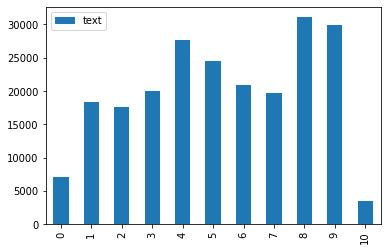

In [23]:
df["id"] = df["date"].astype('category')
df["id"] = df["id"].cat.codes
df["year"] = df["date"].astype("str").str[:4]
data = df.groupby(["year"]).count()["text"].reset_index()
data.plot.bar()


<AxesSubplot:>

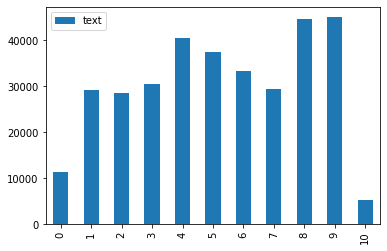

In [24]:
six_sentence["id"] = six_sentence["date"].astype('category')
six_sentence["id"] = six_sentence["id"].cat.codes
six_sentence["year"] = six_sentence["date"].astype("str").str[:4]
data = six_sentence.groupby(["year"]).count()["text"].reset_index()
data.plot.bar()

### Histogram of Meetings

In [2]:
import pandas as pd
import seaborn as sns
df = pd.read_pickle("./ft_meetings_2012-2022.pkl")

In [3]:
df["id"] = df["time"].astype('category')
df["id"] = df["id"].cat.codes
df.head(1)

,speaker,time,text,year,id
0,Aldersformanden Bertel Haarder (V),2012-10-02 H12:00,Ifølge grundloven begynder folketingsåret den ...,2012,0


In [4]:
data = df.groupby(["year"]).nunique()["id"].reset_index()
data


,year,id
0,2012,39
1,2013,103
2,2014,111
3,2015,94
4,2016,116
5,2017,112
6,2018,109
7,2019,94
8,2020,152
9,2021,131


1091


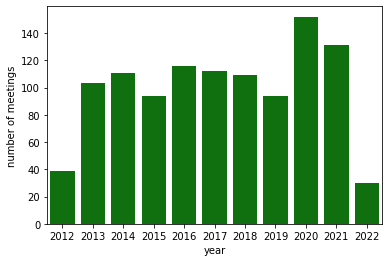

In [5]:
import matplotlib.pyplot as plt
data["number of meetings"] = data["id"]
sns.barplot(data=data, x="year", y="number of meetings", color="green")
plt.savefig('ft-meetings-hist.pdf')
print(data["number of meetings"].sum())